The first part of the code initializes the database that you will need for the last part of the assignment. It also adds some libraries to help with handling your code. If you wish to use more libraries you can add them here. When prompted, you will get a request to allow Google SDK access your google account. Follow the link and accept with your university google account. Copy the verification link. You should see a plot of the PES of H2 if everything was successful.

In [3]:
%pip install netCDF4 
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import math

# from google.colab import drive
# drive.mount('/content/drive/my-drive/Colab_Notebooks/testdata.nc')

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# link = 'https://drive.google.com/file/d/1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF/view?usp=sharing'
# id ='1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('testdata.nc') 
# testdata = 'testdata.nc' 
# ds = nc.Dataset(testdata)

# for var in ds.variables.values():
#     print(var)

# yAxis = []
# xAxis = np.arange(0.25,5.05,0.05)
# for i in range(96):
#   yAxis.append(ds['energy'][i][0:])
  
# plt.ylabel("Ev")
# plt.xlabel("Bond Distance")
# plt.plot(xAxis,yAxis)
# plt.savefig('test_data.png')

Note: you may need to restart the kernel to use updated packages.


Here we create the training data for the first part of the assignment. The input array will be the input of your network, and you will train the network to predict the output that fits to its respective input. 

In [4]:
input_array = np.array([[0,0,1],[1,0,1,],[0,1,1],[1,1,1]])
output_array = np.array([[0],[1],[1],[0]])

To start, we will initialize the neural network. 

1.  The size of the input and output nodes is given by your training data above.
 
2.  Create a hidden layer with 4 nodes. 

3.  Create a weighted connection between the input and hidden layer nodes

4.  Create a weighted connection between the hidden layer nodes and output nodes








In [5]:
#weights1 has the size that can be further dot with the input array

weights1 = np.random.rand(input_array.shape[1],4)  

weights2= np.random.rand(4,1)

# hidden_layer1 = np.random.rand(4,4)
# print(hidden_layer1)
# output_predict = np.random.rand(4,1)


Write a function that transforms the output of a layer with the sigmoid function. Also write a function that generates the derivative of this function. Finally create a learning rate variable to use in updating the network.


With the pieces in place, generate a forward pass of the network. Input each column in the input_array. The network should pass the input to the hidden layers through the weighted connections using the sigmoid function, and from the hidden layers use the connections to reach the ouput node.

In [6]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def der_sigmoid(x):
    return x * (1.0 - x)
  

In [7]:
### create a forward pass network
def forward_pass():
    global hidden_layer1
    global output_predict
    hidden_layer1 = sigmoid(np.dot(input_array, weights1))
    output_predict = sigmoid(np.dot(hidden_layer1, weights2))


# forward_pass() 
# print(hidden_layer1)
# print(output_predict)

Compare the output of your model with each of the training outputs. Subtract the training output from your model output, this is your error. Use this error to calculate the change in the output weights or delta_output. This is calculated by taking the error and multiplying it with the derivative of the output.

Using delta_output, we calculate the change to each of the input layer to hidden layer connections. We multiply delta_output with each of the weighted connections and the derivative of the ouput of each hidden layer. This is the change for each of the input layer to hidden layer weights.

Apply the changes to all of the weights while multipliying them with the learning rate. 




In [8]:
### creat a backword pass network
def backward_feed():
    error = output_array - output_predict
    d_weights2 = np.dot(hidden_layer1.T, 2 * error * der_sigmoid(output_predict))
    global weights2
    global weights1
    d_weights1 = np.dot( input_array.T, np.dot(2 * error * der_sigmoid(output_predict), weights2.T)* der_sigmoid(hidden_layer1))
  # update the weights
    weights1 += d_weights1
    weights2 += d_weights2

# backward_feed()
# print(weights1)
# print(weights2)

We now repeat this process for 10.000 epochs. Check if the error of the model is decreasing over time and aproaches 0. If this the case the model is working and we can apply to the PES data.

In [9]:
for i in range(10000):
    # fig, ax = plt.subplots(2)
    forward_pass()
    backward_feed()
    # ax[0].plot(weights2,der_sigmoid(output_predict),'ro')
    # ax[0].set(title="Loss function vs weights2")
    # ax[1].plot(weights1,der_sigmoid(output_predict),'go')
    # ax[1].set(title="Loss function vs weights1")

# plt.show()
print(output_predict)

[[0.00656042]
 [0.99335382]
 [0.99296537]
 [0.00728248]]


The following code checks if the database data is working and creates an input and output array based on this data. 


(96, 1)
(96, 3)


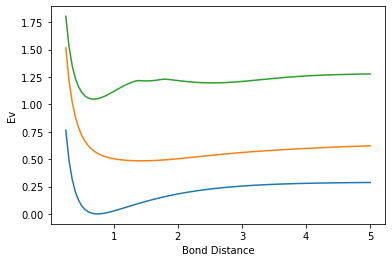

In [10]:
fn = 'testdata.nc'
ds = nc.Dataset(fn)

yAxis = []
xAxis = np.arange(0.25,5.05,0.05)
for i in range(96):
  yAxis.append(ds['energy'][i][0:])

# print(yAxis)  
yAxisMin= np.amin(yAxis)
yAxis = yAxis-yAxisMin
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)
# plt.savefig('test_data.png')

input_array = np.reshape(xAxis, (-1, 1))
output_array = yAxis

print(input_array.shape)
print(output_array.shape)
# print(input_array)
# print(output_array)

Change the shape of the network to fit the training. Run the network and see how well it is performing. To improve performance, consider changing the number of hidden layers, the amount of epochs and the learning rate. Try to find the best parametres to estimate the data.

In [11]:
### set some parameters that could be modify later
NODE = 8
BIAS = 0.5
ALPHA = 0.01

Notes: 

I choose node of 8 at first. The output gives non-values. It gives 'inf'. If I run each forward_pass or backward_feed step by step, I can get true values, but if I use a for loop to run multiple times, the output is either NaN or Inf.

In [12]:
weights1 = np.random.rand(input_array.shape[1],NODE)  
weights2= np.random.rand(NODE,output_array.shape[1])
### create a forward pass network
def forward_pass():
    global hidden_layer1
    global output_predict
    hidden_layer1 = np.dot(input_array, weights1)
    output_predict = np.dot(hidden_layer1, weights2)

forward_pass()
print(hidden_layer1.shape)
print(output_predict)

(96, 8)
[[0.41547091 0.43600129 0.47328667]
 [0.49856509 0.52320155 0.567944  ]
 [0.58165927 0.6104018  0.66260133]
 [0.66475345 0.69760206 0.75725867]
 [0.74784763 0.78480232 0.851916  ]
 [0.83094181 0.87200258 0.94657333]
 [0.91403599 0.95920283 1.04123067]
 [0.99713017 1.04640309 1.135888  ]
 [1.08022435 1.13360335 1.23054533]
 [1.16331853 1.22080361 1.32520267]
 [1.24641272 1.30800386 1.41986   ]
 [1.3295069  1.39520412 1.51451734]
 [1.41260108 1.48240438 1.60917467]
 [1.49569526 1.56960464 1.703832  ]
 [1.57878944 1.65680489 1.79848934]
 [1.66188362 1.74400515 1.89314667]
 [1.7449778  1.83120541 1.987804  ]
 [1.82807198 1.91840567 2.08246134]
 [1.91116616 2.00560592 2.17711867]
 [1.99426034 2.09280618 2.271776  ]
 [2.07735453 2.18000644 2.36643334]
 [2.16044871 2.2672067  2.46109067]
 [2.24354289 2.35440695 2.555748  ]
 [2.32663707 2.44160721 2.65040534]
 [2.40973125 2.52880747 2.74506267]
 [2.49282543 2.61600773 2.83972   ]
 [2.57591961 2.70320799 2.93437734]
 [2.65901379 2.79040

In [ ]:
### creat a backword pass network
def backward_feed():
    error = output_array - output_predict
    d_weights2 = np.dot(hidden_layer1.T, 2 * error)
    global weights2
    global weights1
    d_weights1 = np.dot( input_array.T, np.dot(2 * error, weights2.T))
  # update the weights
    weights1 += d_weights1
    weights2 += d_weights2

backward_feed()
print(output_predict)

[[0.42541133 0.23165027 0.49033513]
 [0.5104936  0.27798032 0.58840215]
 [0.59557587 0.32431037 0.68646918]
 [0.68065813 0.37064043 0.78453621]
 [0.7657404  0.41697048 0.88260323]
 [0.85082267 0.46330053 0.98067026]
 [0.93590493 0.50963059 1.07873728]
 [1.0209872  0.55596064 1.17680431]
 [1.10606947 0.6022907  1.27487134]
 [1.19115173 0.64862075 1.37293836]
 [1.276234   0.6949508  1.47100539]
 [1.36131627 0.74128086 1.56907241]
 [1.44639853 0.78761091 1.66713944]
 [1.5314808  0.83394096 1.76520646]
 [1.61656307 0.88027102 1.86327349]
 [1.70164534 0.92660107 1.96134052]
 [1.7867276  0.97293112 2.05940754]
 [1.87180987 1.01926118 2.15747457]
 [1.95689214 1.06559123 2.25554159]
 [2.0419744  1.11192128 2.35360862]
 [2.12705667 1.15825134 2.45167565]
 [2.21213894 1.20458139 2.54974267]
 [2.2972212  1.25091144 2.6478097 ]
 [2.38230347 1.2972415  2.74587672]
 [2.46738574 1.34357155 2.84394375]
 [2.552468   1.3899016  2.94201077]
 [2.63755027 1.43623166 3.0400778 ]
 [2.72263254 1.48256171 3.13

In [13]:
for i in range(5):
    forward_pass()
    backward_feed()

print(output_predict)


[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan 

<ipython-input-8-1b53baa85642>:4: RuntimeWarning: overflow encountered in multiply
  d_weights2 = np.dot(hidden_layer1.T, 2 * error * der_sigmoid(output_predict))
<ipython-input-8-1b53baa85642>:7: RuntimeWarning: overflow encountered in multiply
  d_weights1 = np.dot( input_array.T, np.dot(2 * error * der_sigmoid(output_predict), weights2.T)* der_sigmoid(hidden_layer1))


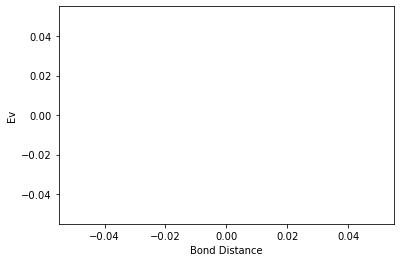

In [14]:
# xAxis = input_array
yAxis = output_predict
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)